In [ ]:
"""parameters: c, kernel, gamma
c: default: 1
kernel: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. default: ‘rbf’
gamma - rbf, poly, sigmoid
"""

In [7]:
#introduction to machinelearning with python p87 
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
#from sklearn.learning_curve import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_curve, auc

from time import time
from scipy import stats
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

#from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, stratify = digits.target, random_state=0)

svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)
print("SVC train score: {:.3f}".format(svc_clf.score(X_train, y_train)))
print("SVC test score: {:.3f}".format(svc_clf.score(X_test, y_test)))
print(svc_clf.get_params)

SVC train score: 1.000
SVC test score: 0.571
<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>


In [15]:
print("-----------------------")
svc_final = SVC(gamma = 'auto', random_state = 0)
start = time()
svc_final.fit(X_train, y_train)
print("time took: %.3f seconds "%(time() - start))  #after fitting
print("SVC-Scaled final score - training (tanh, sgd, alpha:) : {:.3f}".format(svc_final.score(X_train, y_train)))
print("SVC-Scaled final score - test (tanh, sgd, alpha:) : {:.3f}".format(svc_final.score(X_test, y_test)))
print("-----------------------")


-----------------------
time took: 0.372 seconds 
SVC-Scaled final score - training (tanh, sgd, alpha:) : 1.000


NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [3]:
print(svc_scaled.get_params)

<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)>


### Grid Search

In [12]:
#grid search v. randomize search
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")   

#---------------------------------------------------------------------------------------------
param_grid = {'C': 10.0 ** np.arange(-3, 2),
              'kernel': [ 'poly', 'rbf', 'sigmoid'], #'linear', 'precomputed'
              'gamma':  10.0 ** np.arange(-3, 0)}
             #'gamma': ['auto']}
            
grid_search = GridSearchCV(svc, param_grid = param_grid, cv = 5)
start = time()
grid_search.fit(X_train, y_train)
print("***GridSearchCV took %.2f seconds for %d candidates parameter settings."
      %((time() - start), len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)
print(param_grid)

KeyboardInterrupt: 

### Validation Curve


[1.000e-03 1.010e-01 2.010e-01 3.010e-01 4.010e-01 5.010e-01 6.010e-01
 7.010e-01 8.010e-01 9.010e-01 1.001e+00 1.101e+00 1.201e+00 1.301e+00
 1.401e+00 1.501e+00 1.601e+00 1.701e+00 1.801e+00 1.901e+00 2.001e+00
 2.101e+00 2.201e+00 2.301e+00 2.401e+00 2.501e+00 2.601e+00 2.701e+00
 2.801e+00 2.901e+00 3.001e+00 3.101e+00 3.201e+00 3.301e+00 3.401e+00
 3.501e+00 3.601e+00 3.701e+00 3.801e+00 3.901e+00 4.001e+00 4.101e+00
 4.201e+00 4.301e+00 4.401e+00 4.501e+00 4.601e+00 4.701e+00 4.801e+00
 4.901e+00 5.001e+00 5.101e+00 5.201e+00 5.301e+00 5.401e+00 5.501e+00
 5.601e+00 5.701e+00 5.801e+00 5.901e+00 6.001e+00 6.101e+00 6.201e+00
 6.301e+00 6.401e+00 6.501e+00 6.601e+00 6.701e+00 6.801e+00 6.901e+00
 7.001e+00 7.101e+00 7.201e+00 7.301e+00 7.401e+00 7.501e+00 7.601e+00
 7.701e+00 7.801e+00 7.901e+00 8.001e+00 8.101e+00 8.201e+00 8.301e+00
 8.401e+00 8.501e+00 8.601e+00 8.701e+00 8.801e+00 8.901e+00 9.001e+00
 9.101e+00 9.201e+00 9.301e+00 9.401e+00 9.501e+00 9.601e+00 9.701e+00
 9.801

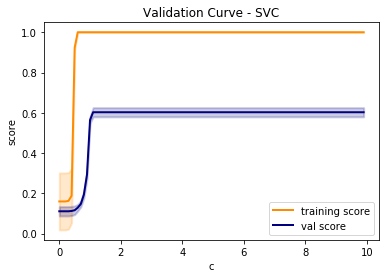

[0.15954218 0.15954218 0.15954218 0.16238687 0.18775328 0.92304509
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
[0

In [17]:
#gamma =  np.arange ( 0.001, 0.101, 0.001)
c=  np.arange ( 0.001, 10, 0.1)
training_score, val_score = validation_curve(SVC(gamma = 'auto', random_state = 0),  
                                             X_train, y_train,
                                             param_name = "C", 
                                             param_range = c, cv= 7)
print(c)

train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("Validation Curve - SVC") 
plt.xlabel("c")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(c, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(c, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(c, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(c, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend()
plt.show()    
print(train_score_mean)
print(val_score_mean)

[0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011 0.012
 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023 0.024
 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035 0.036
 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047 0.048
 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059 0.06
 0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07  0.071 0.072
 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082 0.083 0.084
 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094 0.095 0.096
 0.097 0.098 0.099 0.1  ]


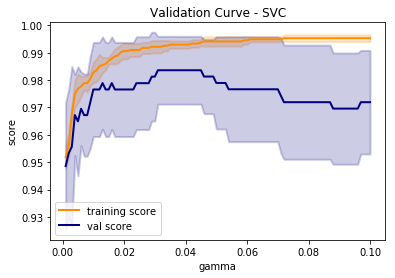

[0.95188361 0.95618463 0.96752423 0.97495421 0.97691009 0.97769609
 0.97887241 0.97887134 0.98043583 0.9827831  0.98356481 0.98513144
 0.98552283 0.98591422 0.98708947 0.98787332 0.98865503 0.98904749
 0.99022274 0.99061306 0.99061306 0.99100338 0.99100338 0.99100338
 0.99100338 0.99178509 0.99178509 0.99178509 0.99217648 0.99217648
 0.99217648 0.99217648 0.99256787 0.99256787 0.99295926 0.99295926
 0.99295926 0.99295926 0.99295926 0.99295926 0.99295926 0.99335065
 0.99335065 0.99335065 0.99374097 0.99413235 0.99413235 0.99413235
 0.99413235 0.99413235 0.99413235 0.99413235 0.99413235 0.99413235
 0.99413235 0.99413235 0.99413235 0.99413235 0.99452374 0.99452374
 0.99491406 0.99491406 0.99491406 0.99491406 0.99491406 0.99491406
 0.99491406 0.99491406 0.99491406 0.99491406 0.99491406 0.99530653
 0.99530653 0.99530653 0.99530653 0.99530653 0.99530653 0.99530653
 0.99530653 0.99530653 0.99530653 0.99530653 0.99530653 0.99530653
 0.99530653 0.99530653 0.99530653 0.99530653 0.99530653 0.9953

In [26]:
gamma =  np.arange ( 0.001, 0.101, 0.001)
#c=  np.arange ( 0.5, 15, 0.5)
training_score, val_score = validation_curve(SVC(random_state = 0),  
                                             X_train, y_train,
                                             param_name = "gamma", 
                                             param_range = gamma, cv= 7)
print(gamma)

train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("Validation Curve - SVC") 
plt.xlabel("gamma")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(gamma, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(gamma, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(gamma, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(gamma, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend()
plt.show()    
print(train_score_mean)
print(val_score_mean)

### Learning Curve

In [ ]:
#learning curve
def plot_learning_curve (estimator, title, X,y, ylim = None, cv = None, 
                         n_jobs = None, train_sizes = np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim (*ylim)
    plt.xlabel ("Training examples")
    plt.ylabel ("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.1, color = "r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r", label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g", label = "Cross-validation score")
    plt.legend(loc ="best")
    return plt

X, y = X_train, y_train

title = "Learning Curves - SVM"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 1)
estimator = svc_final
plot_learning_curve(estimator, title, X, y, cv = cv, n_jobs = 4)